In [341]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [342]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


In [343]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [344]:
X, Y = load_planar_dataset()

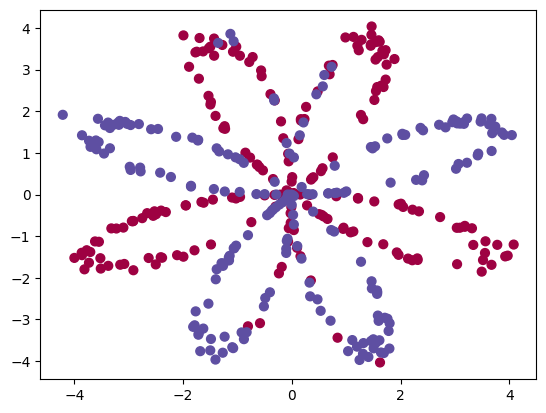

In [345]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [346]:
shape_X=X.shape
shape_Y=Y.shape
m=X.shape[1]
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


# 3 - Simple Logistic Regression


In [347]:
clf=sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T,Y.T)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

Text(0.5, 1.0, 'Logistic Regression')

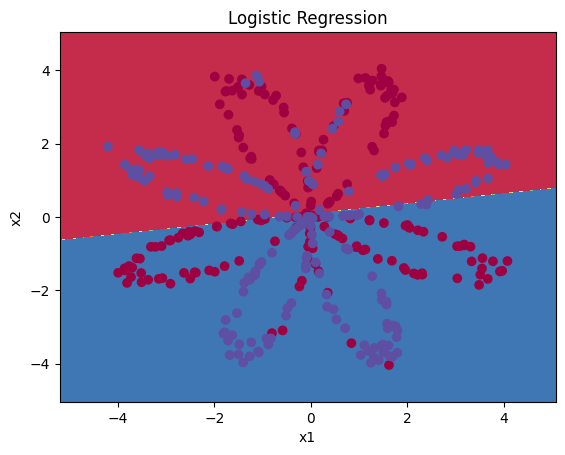

In [348]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

In [349]:
from sklearn.metrics import accuracy_score

In [350]:
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


<ipython-input-350-9f14209890f7>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


In [351]:
def layer_sizes(X, Y):
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    return (n_x,n_h,n_y)

In [352]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1=np.zeros((n_h,1))
    W2= np.random.randn(n_y, n_h) * 0.01
    b2=np.zeros((n_y,1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [353]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [354]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1=np.matmul(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.matmul(W2,A1)+b2
    A2=sigmoid(Z2)
    cache={
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    return A2,cache


#  Compute the Cost

In [355]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs=np.log(A2)*Y+np.log(1-A2)*(1-Y)
    cost=np.sum(logprobs)*-1/m
    cost = float(np.squeeze(cost))
    return cost

In [356]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"] #(4,2)
    W2 = parameters["W2"] #(1,4)
    A1 = cache["A1"]#(4,400)
    A2 = cache["A2"]#(1,400)

    dZ2=A2-Y #(1,400)
    dW2=np.matmul(dZ2,A1.T)*1/m#(1,4)
    db2=np.sum(dZ2,axis=1,keepdims=True)*1/m#(1,1)
    dZ1=np.matmul(W2.T,dZ2)*(1-np.power(A1,2))
    dW1=np.matmul(dZ1,X.T)*1/m
    db1=np.sum(dZ1,axis=1,keepdims=True)*1/m#(4,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [357]:
def update_parameters(parameters, grads, learning_rate = 1):
    W1 = copy.deepcopy(parameters["W1"])
    b1 = parameters["b1"]
    W2 = copy.deepcopy(parameters["W2"])
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [358]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters=initialize_parameters(n_x,n_h,n_y)
    for i in range(num_iterations):
      A2,cache=forward_propagation(X,parameters)
      cost=compute_cost(A2,Y)
      grads=backward_propagation(parameters,cache,X,Y)
      parameters=update_parameters(parameters,grads)
      if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [359]:
parameters=nn_model(X,Y,4,10000,True)

Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.266234
Cost after iteration 2000: 0.243968
Cost after iteration 3000: 0.234636
Cost after iteration 4000: 0.228920
Cost after iteration 5000: 0.224917
Cost after iteration 6000: 0.221913
Cost after iteration 7000: 0.219558
Cost after iteration 8000: 0.217661
Cost after iteration 9000: 0.216104


In [360]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [361]:
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,predictions.T) + np.dot(1-Y,(1-predictions).T))/float(Y.size)*100) +'% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 91 % (percentage of correctly labelled datapoints)


<ipython-input-361-b182779ef789>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,predictions.T) + np.dot(1-Y,(1-predictions).T))/float(Y.size)*100) +'% ' + "(percentage of correctly labelled datapoints)")


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

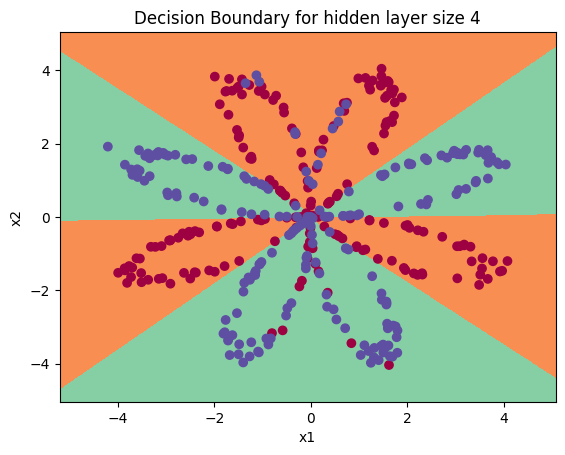

In [362]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))